In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from matplotlib.axis import Axis
import datetime as dt

In [54]:
def get_data2(filename):    
    data = pd.read_csv(filename) #, names=["Interval","kWh"])
    return data

In [55]:
conso_file = r"\\192.168.0.175\pihome\Documents\conso2.csv"
conso_data = get_data2(conso_file)
conso_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1049205 entries, 0 to 1049204
Data columns (total 2 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   Interval  1049205 non-null  int64  
 1   kWh       1049205 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 16.0 MB


In [56]:
conso_data['kWh']

0          0.16
1          0.16
2          0.16
3          0.16
4          0.16
           ... 
1049200    0.12
1049201    0.12
1049202    0.12
1049203    0.12
1049204    0.12
Name: kWh, Length: 1049205, dtype: float64

In [57]:
conso_data['kWh']

0          0.16
1          0.16
2          0.16
3          0.16
4          0.16
           ... 
1049200    0.12
1049201    0.12
1049202    0.12
1049203    0.12
1049204    0.12
Name: kWh, Length: 1049205, dtype: float64

In [58]:
l=len(conso_data)-1
l

1049204

In [59]:
conso_data['sec']=conso_data['Interval']/1000


In [60]:
conso_data['Wh']=3600000/conso_data['Interval']


In [61]:
conso_data['cumul(ms)']=conso_data['Interval'].cumsum(axis=0)

In [62]:
conso_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1049205 entries, 0 to 1049204
Data columns (total 5 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   Interval   1049205 non-null  int64  
 1   kWh        1049205 non-null  float64
 2   sec        1049205 non-null  float64
 3   Wh         1049205 non-null  float64
 4   cumul(ms)  1049205 non-null  int64  
dtypes: float64(3), int64(2)
memory usage: 40.0 MB


In [63]:
conso_data.tail()

,Interval,kWh,sec,Wh,cumul(ms)
1049200,29269,0.12,29.269,122.997028,24079630597
1049201,29611,0.12,29.611,121.576441,24079660208
1049202,29142,0.12,29.142,123.533045,24079689350
1049203,28890,0.12,28.890,124.610592,24079718240
1049204,29252,0.12,29.252,123.068508,24079747492


In [64]:
cumtime= int(conso_data._get_value(l,'cumul(ms)')*1000)  # convert to microseconds
cumtime

24079747492000

In [65]:
from datetime import datetime, timedelta
now = datetime.now()
# conso.csv dynamique
base = now - timedelta(microseconds=cumtime)
base  # date de début

datetime.datetime(2023, 8, 21, 17, 51, 28, 554172)

In [66]:
conso_data['cumul(ms)'][conso_data['cumul(ms)'].isna()==True]

Series([], Name: cumul(ms), dtype: int64)

In [67]:
conso_data.iloc[0]


Interval     21934.00000
kWh              0.16000
sec             21.93400
Wh             164.12875
cumul(ms)    21934.00000
Name: 0, dtype: float64

In [68]:
conso_data['dates'] = [base + dt.timedelta(microseconds=t*1000) for t in conso_data['cumul(ms)']]


In [69]:
conso_data['days']= [d.strftime('%d/%m/%y') for d in conso_data['dates']]    
#[str(d.month)+'-'+str(d.day) for d in conso_data['dates']]
conso_data

,Interval,kWh,sec,Wh,cumul(ms),dates,days
0,21934,0.16,21.934,164.128750,21934,2023-08-21 17:51:50.488172,21/08/23
1,21858,0.16,21.858,164.699424,43792,2023-08-21 17:52:12.346172,21/08/23
2,22001,0.16,22.001,163.628926,65793,2023-08-21 17:52:34.347172,21/08/23
3,21928,0.16,21.928,164.173659,87721,2023-08-21 17:52:56.275172,21/08/23
4,21891,0.16,21.891,164.451144,109612,2023-08-21 17:53:18.166172,21/08/23
...,...,...,...,...,...,...,...
1049200,29269,0.12,29.269,122.997028,24079630597,2024-05-26 10:38:39.151172,26/05/24
1049201,29611,0.12,29.611,121.576441,24079660208,2024-05-26 10:39:08.762172,26/05/24
1049202,29142,0.12,29.142,123.533045,24079689350,2024-05-26 10:39:37.904172,26/05/24
1049203,28890,0.12,28.890,124.610592,24079718240,2024-05-26 10:40:06.794172,26/05/24


In [70]:
# tranche journalière
now = datetime.now()
month = now.month
year = now.year
day = now.strftime('%d/%m/%y')    #str(now.month)+'-'+str(now.day)
day, month, year


('26/05/24', 5, 2024)

In [71]:
here = now.strftime('%H:%M:%S')
here

'10:40:52'

In [72]:
conso_day = conso_data[conso_data['days']==day]
# save to file
filename='conso_jour.csv'
conso_day.to_csv(filename)
filename='../conso_jour.csv'
conso_day.to_csv(filename)

In [73]:
conso_day

,Interval,kWh,sec,Wh,cumul(ms),dates,days
1047937,17828,0.20,17.828,201.929549,24041313193,2024-05-26 00:00:01.747172,26/05/24
1047938,17796,0.20,17.796,202.292650,24041330989,2024-05-26 00:00:19.543172,26/05/24
1047939,18071,0.20,18.071,199.214211,24041349060,2024-05-26 00:00:37.614172,26/05/24
1047940,18080,0.20,18.080,199.115044,24041367140,2024-05-26 00:00:55.694172,26/05/24
1047941,18237,0.20,18.237,197.400888,24041385377,2024-05-26 00:01:13.931172,26/05/24
...,...,...,...,...,...,...,...
1049200,29269,0.12,29.269,122.997028,24079630597,2024-05-26 10:38:39.151172,26/05/24
1049201,29611,0.12,29.611,121.576441,24079660208,2024-05-26 10:39:08.762172,26/05/24
1049202,29142,0.12,29.142,123.533045,24079689350,2024-05-26 10:39:37.904172,26/05/24
1049203,28890,0.12,28.890,124.610592,24079718240,2024-05-26 10:40:06.794172,26/05/24


In [74]:
# group by day
grouped = conso_data[['days','kWh']].groupby('days', sort=False)
'''conso_graph=[]
for name, group in grouped:
    if name=='01/04/2024':print(group)
    #print("\n", name, len(group)/1000)
    conso_graph.append((name,len(group)/1000))'''
#grouped
# count elements in each group => conso in watts => convert to kW
df_grp = grouped.count()/1000


In [75]:
data = list(df_grp['kWh'])
print(data)


[1.04, 3.661, 4.225, 3.73, 4.239, 4.615, 3.449, 3.437, 3.533, 3.619, 3.95, 3.68, 4.267, 3.871, 3.382, 3.636, 3.28, 3.468, 4.217, 4.046, 4.046, 3.962, 3.422, 4.428, 3.748, 3.753, 4.536, 4.639, 3.692, 3.154, 3.186, 4.104, 3.574, 3.182, 3.797, 4.167, 3.756, 3.553, 4.796, 4.223, 4.506, 3.748, 3.375, 4.34, 3.878, 3.883, 3.452, 4.078, 3.63, 3.396, 4.103, 3.409, 3.918, 3.804, 3.645, 3.735, 4.232, 3.281, 3.903, 2.911, 2.055, 2.042, 2.531, 4.086, 3.761, 4.325, 3.663, 3.854, 3.73, 4.061, 3.846, 4.179, 3.627, 3.179, 3.756, 3.538, 3.595, 3.703, 3.678, 3.232, 3.894, 3.281, 3.747, 3.585, 4.113, 3.668, 3.311, 3.778, 4.12, 4.352, 4.091, 4.087, 4.1, 3.747, 3.934, 3.901, 3.883, 3.772, 4.057, 4.294, 3.882, 3.53, 3.661, 3.67, 3.338, 3.864, 3.976, 4.122, 3.463, 4.181, 3.623, 4.154, 4.451, 3.727, 3.382, 3.595, 4.336, 3.497, 4.136, 3.935, 3.732, 3.609, 5.127, 3.694, 3.763, 4.326, 4.071, 4.845, 4.389, 3.91, 3.805, 4.423, 4.527, 4.356, 4.717, 4.364, 3.61, 4.268, 3.719, 3.531, 3.519, 4.024, 3.604, 3.794, 3.57, 

In [76]:
# save to file
import pickle
path = r'kwh_mean.pkl'
with open(path,'wb') as file:
    pickle.dump(data, file)

In [77]:
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
def show(day,pltcolor='darkcyan',bgcolor="ivory"):
    conso_day=conso_data[conso_data['days']==day].copy()  # no more error
    conso_day['heure']=conso_day['dates'].apply(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))
    #=[x.hour for x in conso_day['dates']]
    df= conso_day.set_index('heure')
    here = now.strftime('%H:%M:%S')
    conso_jour=len(df['kWh'])
    here, len(df)/1000, conso_jour

    # consommation d'une journée entière à partir de minuit
    # Set background color of the outer 
    # area of the plt
    #plt.figure(facecolor=fgcolor)
    fig, ax = plt.subplots(facecolor=pltcolor)
    
    major_ticks=300;minor_ticks=100
    ax.xaxis.set_major_locator(MultipleLocator(major_ticks))  # major ticks tous les 15 min
    ax.xaxis.set_minor_locator(MultipleLocator(minor_ticks))
    # the size of A4 paper
    fig.set_size_inches(10, 5)
    
    # set bg color
    ax.set_facecolor(bgcolor)
    plt.plot(df['kWh'])
    #plt.plot(conso_day['heure'],conso_day['kWh'])
    plt.title(f'Journée du {day} {here} : {conso_jour/1000} kwh')
    plt.grid()


In [78]:
def conso_byhour(day):
    conso_day=conso_data[conso_data['days']==day].copy()  # no more error
    conso_day['heure']=conso_day['dates'].apply(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))

    conso_hours = conso_day.copy()
    conso_hours['hours']= conso_hours['dates'].dt.strftime('%H')
    conso_hours#.info()
    # group by hour
    groupedbyhour = conso_hours[['hours','kWh']].groupby('hours', sort=False)
    groupedbyhour.count()
    len(groupedbyhour)
    x = np.arange(1,len(groupedbyhour)+1)

    #groupedbyhour.count().plot(grid=True,xticks=x)
    plt.figure(figsize=(12, 8),facecolor='darkcyan')
    values = groupedbyhour.count().kWh
    #ax = plt.bar(x,groupedbyhour.count().kWh)
    ax = values.plot(kind="bar",color='green',width=.8)
    ax.set_facecolor('antiquewhite')
    #plt.grid()
    plt.tight_layout()
    plt.title(f'Conso by hour (W) - {day}')
    plt.xlim(-1,len(x)+1)
    
    rects = ax.patches

    # Make some labels.
    labels = [f"{i}" for i in values]
    
    for rect, label in zip(rects, labels):
        height = rect.get_height()
        ax.text(
            rect.get_x() + rect.get_width() / 2, height + 5, label, ha="center", va="bottom",
            fontfamily='calibri', fontsize=16, fontweight='bold', color='blue'
        )
    
    

In [79]:
# mean of all instant conso
total_mean = conso_data[['kWh']].mean()
total_mean

kWh    0.313823
dtype: float64

In [80]:
mean=(grouped.count()/1000).mean()
mean

kWh    3.747161
dtype: float64

In [81]:
last=df_grp.iloc[-1]['kWh']
last

1.268

<Axes: xlabel='heure'>

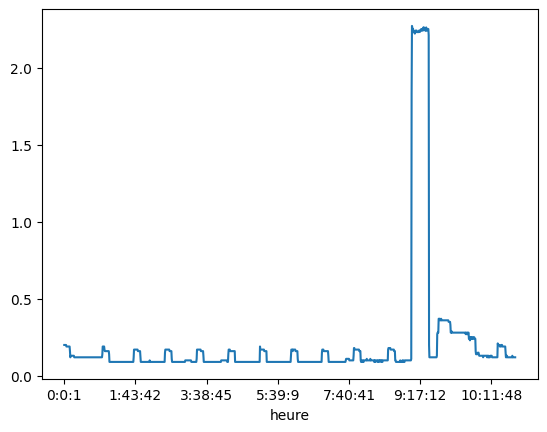

In [82]:
conso_day=conso_data[conso_data['days']==day].copy()  # no more error
conso_day['heure']=conso_day['dates'].apply(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))
#=[x.hour for x in conso_day['dates']]
df= conso_day.set_index('heure')
df.tail(2000)['kWh'].plot()

In [83]:
df_byhour = df[['days','kWh']].groupby('heure', sort=False)
list(df_byhour)

[('0:0:1',
             days  kWh
  heure               
  0:0:1  26/05/24  0.2),
 ('0:0:19',
              days  kWh
  heure                
  0:0:19  26/05/24  0.2),
 ('0:0:37',
              days  kWh
  heure                
  0:0:37  26/05/24  0.2),
 ('0:0:55',
              days  kWh
  heure                
  0:0:55  26/05/24  0.2),
 ('0:1:13',
              days  kWh
  heure                
  0:1:13  26/05/24  0.2),
 ('0:1:32',
              days  kWh
  heure                
  0:1:32  26/05/24  0.2),
 ('0:1:50',
              days   kWh
  heure                 
  0:1:50  26/05/24  0.19),
 ('0:2:9',
             days   kWh
  heure                
  0:2:9  26/05/24  0.19),
 ('0:2:27',
              days   kWh
  heure                 
  0:2:27  26/05/24  0.19),
 ('0:2:46',
              days   kWh
  heure                 
  0:2:46  26/05/24  0.19),
 ('0:3:4',
             days   kWh
  heure                
  0:3:4  26/05/24  0.19),
 ('0:3:23',
              days   kWh
  heure       

In [84]:
kwh_byhour = list(df_byhour['kWh'])
kwh_byhour

[('0:0:1',
  heure
  0:0:1    0.2
  Name: kWh, dtype: float64),
 ('0:0:19',
  heure
  0:0:19    0.2
  Name: kWh, dtype: float64),
 ('0:0:37',
  heure
  0:0:37    0.2
  Name: kWh, dtype: float64),
 ('0:0:55',
  heure
  0:0:55    0.2
  Name: kWh, dtype: float64),
 ('0:1:13',
  heure
  0:1:13    0.2
  Name: kWh, dtype: float64),
 ('0:1:32',
  heure
  0:1:32    0.2
  Name: kWh, dtype: float64),
 ('0:1:50',
  heure
  0:1:50    0.19
  Name: kWh, dtype: float64),
 ('0:2:9',
  heure
  0:2:9    0.19
  Name: kWh, dtype: float64),
 ('0:2:27',
  heure
  0:2:27    0.19
  Name: kWh, dtype: float64),
 ('0:2:46',
  heure
  0:2:46    0.19
  Name: kWh, dtype: float64),
 ('0:3:4',
  heure
  0:3:4    0.19
  Name: kWh, dtype: float64),
 ('0:3:23',
  heure
  0:3:23    0.19
  Name: kWh, dtype: float64),
 ('0:3:42',
  heure
  0:3:42    0.19
  Name: kWh, dtype: float64),
 ('0:4:0',
  heure
  0:4:0    0.19
  Name: kWh, dtype: float64),
 ('0:4:19',
  heure
  0:4:19    0.19
  Name: kWh, dtype: float64),
 ('0:4:38

In [85]:
# premier kWh
if len(df)>1000:
    df.iloc[1000]['dates']

In [86]:
df.iloc[0].dates

Timestamp('2024-05-26 00:00:01.747172')

In [87]:
def period(p=1):
    if p==1:
        start = df.iloc[0].dates
    else:
        start = df.iloc[(p-1)*1000-1].dates
    if len(df)>p*1000:
        end = df.iloc[p*1000-1].dates
        conso = p*1000
    else:
        end = df.iloc[len(df)-1].dates
        conso = len(df) - (p-1)*1000
    period = end - start  # type timedelta
    hours = int(period / dt.timedelta(hours=1))
    mins = int(period / dt.timedelta(minutes=1)) - hours*60
    secs = int(period / dt.timedelta(seconds=1)) - hours*3600 - mins*60

    #df.iloc[1001:2000]['dates']#.tail(1)
    #print(period)
    print(f'{start}\t{end}\t{hours}h {mins}m {secs}s \t{conso}')


In [88]:
df.dates.dt.time

heure
0:0:1       00:00:01.747172
0:0:19      00:00:19.543172
0:0:37      00:00:37.614172
0:0:55      00:00:55.694172
0:1:13      00:01:13.931172
                 ...       
10:38:39    10:38:39.151172
10:39:8     10:39:08.762172
10:39:37    10:39:37.904172
10:40:6     10:40:06.794172
10:40:36    10:40:36.046172
Name: dates, Length: 1268, dtype: object

In [89]:
for p in range(1,6):  # les 5 tranches de kWh consommés
    if len(df)>(p-1)*1000:
        period(p)

2024-05-26 00:00:01.747172	2024-05-26 09:17:10.469172	9h 17m 8s 	1000
2024-05-26 09:17:10.469172	2024-05-26 10:40:36.046172	1h 23m 25s 	268


In [90]:
# conso temps réel
here = now.strftime('%H:%M:%S')
conso_jour=len(df['kWh'])
here, len(df)/1000, conso_jour

('10:40:52', 1.268, 1268)

In [91]:
df_grp.tail(7)

,kWh
days,
20/05/24,4.369
21/05/24,4.183
22/05/24,3.453
23/05/24,3.398
24/05/24,4.868
25/05/24,3.591
26/05/24,1.268


Text(0.5, 1.0, 'Week conso')

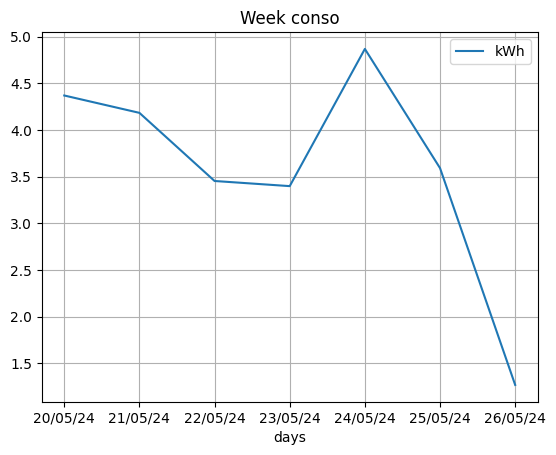

In [92]:
# last week conso
df_grp.tail(7).plot(grid=True)
plt.title('Week conso')

In [93]:
current=plt.get_current_fig_manager()
current.set_window_title('Conso by day')
#help(current.canvas)
#,facecolor='darkcyan')

<Figure size 640x480 with 0 Axes>

In [94]:
#plt.style.use('fivethirtyeight')
#plt.style.use('ggplot')
#plt.style.use('dark_background')


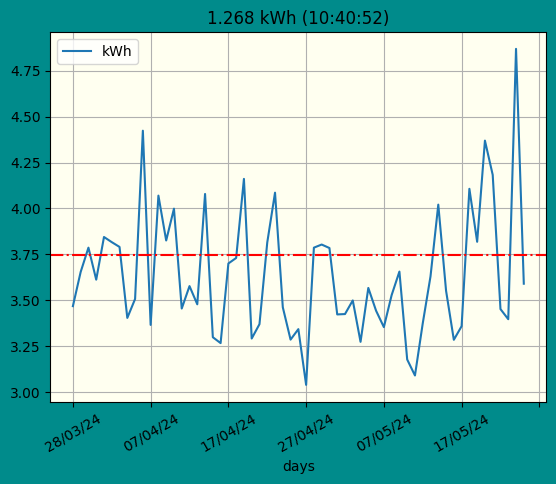

In [95]:
# pandas plot the day consos in the group
fig, ax = plt.subplots(facecolor='darkcyan')  # as argument
#or fig.patch.set_facecolor('darkcyan') # This changes the grey to white
ax.set_facecolor("ivory")
# 2 last months
df_grp.iloc[-60:-1].plot(grid=True,ax=ax, y=["kWh"])   #df.plot(x="Name", y=["Age", "Height(in cm)"], kind="bar", ax=ax)
plt.title(str(last)+' kWh ('+str(here)+')')
plt.axhline(y=np.nanmean(df_grp),c='red', ls='-.')
plt.xticks(rotation=30);  # https://ipython.readthedocs.io/en/stable/interactive/tips.html


In [96]:
df_grp.head()

,kWh
days,
21/08/23,1.040
22/08/23,3.661
23/08/23,4.225
24/08/23,3.730
25/08/23,4.239


In [97]:
df_grp.tail()

,kWh
days,
22/05/24,3.453
23/05/24,3.398
24/05/24,4.868
25/05/24,3.591
26/05/24,1.268


In [98]:
#add hours column
conso_hours = conso_day.copy()
conso_hours['hours']= conso_hours['dates'].dt.strftime('%H')
conso_hours.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1268 entries, 1047937 to 1049204
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Interval   1268 non-null   int64         
 1   kWh        1268 non-null   float64       
 2   sec        1268 non-null   float64       
 3   Wh         1268 non-null   float64       
 4   cumul(ms)  1268 non-null   int64         
 5   dates      1268 non-null   datetime64[ns]
 6   days       1268 non-null   object        
 7   heure      1268 non-null   object        
 8   hours      1268 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 99.1+ KB


In [99]:
day

'26/05/24'

In [100]:

# group conso by hour
groupedbyhour = conso_hours[['hours','kWh']].groupby('hours', sort=False)
list(groupedbyhour)

[('00',
          hours   kWh
  1047937    00  0.20
  1047938    00  0.20
  1047939    00  0.20
  1047940    00  0.20
  1047941    00  0.20
  ...       ...   ...
  1048063    00  0.14
  1048064    00  0.09
  1048065    00  0.09
  1048066    00  0.09
  1048067    00  0.09
  
  [131 rows x 2 columns]),
 ('01',
          hours   kWh
  1048068    01  0.09
  1048069    01  0.09
  1048070    01  0.09
  1048071    01  0.09
  1048072    01  0.09
  ...       ...   ...
  1048163    01  0.09
  1048164    01  0.09
  1048165    01  0.09
  1048166    01  0.09
  1048167    01  0.09
  
  [100 rows x 2 columns]),
 ('02',
          hours   kWh
  1048168    02  0.09
  1048169    02  0.09
  1048170    02  0.09
  1048171    02  0.09
  1048172    02  0.09
  ...       ...   ...
  1048264    02  0.09
  1048265    02  0.09
  1048266    02  0.09
  1048267    02  0.09
  1048268    02  0.09
  
  [101 rows x 2 columns]),
 ('03',
          hours   kWh
  1048269    03  0.09
  1048270    03  0.09
  1048271    03  0.0

In [101]:
groupedbyhour.count()


,kWh
hours,
00,131
01,100
02,101
03,101
04,100
05,99
06,104
07,105
08,107


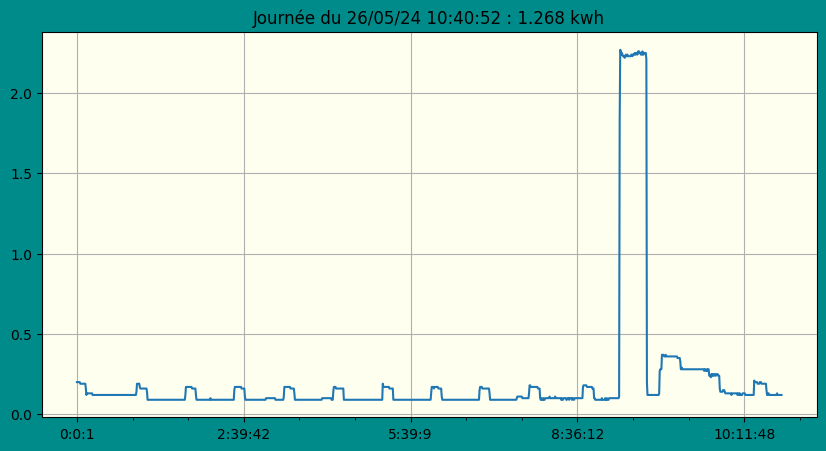

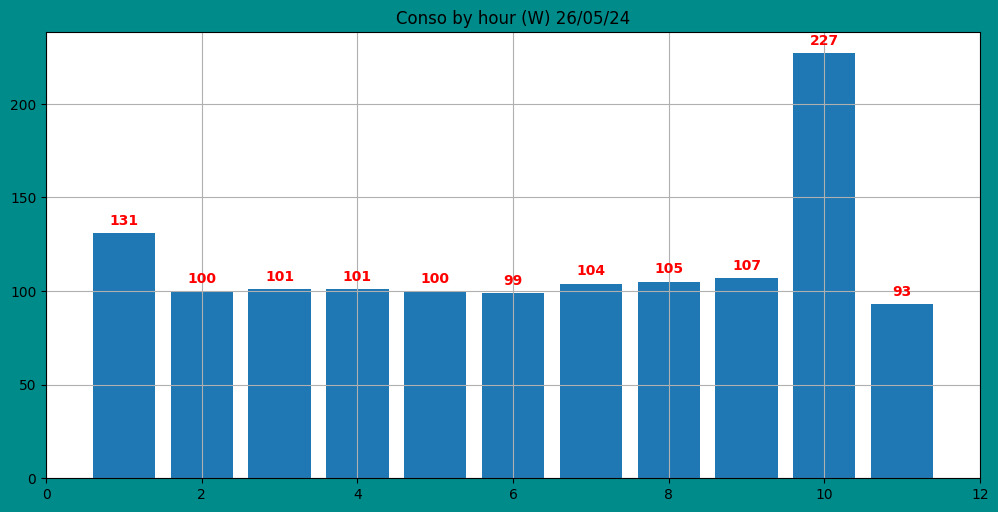

In [102]:
show(day,bgcolor='ivory')
data = groupedbyhour.count().kWh
#len(groupedbyhour)
x = np.arange(1,len(groupedbyhour)+1)
ymax = max(data)+5
#groupedbyhour.count().plot(grid=True,xticks=x)
fig, ax = plt.subplots(figsize=(10, 5), facecolor='darkcyan')

plt.bar(x,data)
plt.grid()
plt.tight_layout()
plt.title(f'Conso by hour (W) {day}')
plt.xlim(0,len(x)+1)
#plt.ylim(0,ymax)

rects = ax.patches

# Make some labels.
labels = [f"{i}" for i in data]
fontfamily = {'calibri', 'serif', 'sans-serif', 'cursive', 'fantasy', 'monospace'}
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(
        rect.get_x() + rect.get_width() / 2, height + 3, label, ha="center", va="bottom",
        fontfamily=fontfamily, fontsize=10, fontweight='bold', color='red'
    )


In [103]:
# save to file
import pickle
path = r'../consobyhour.pkl'
with open(path,'wb') as file:
    pickle.dump(data, file)

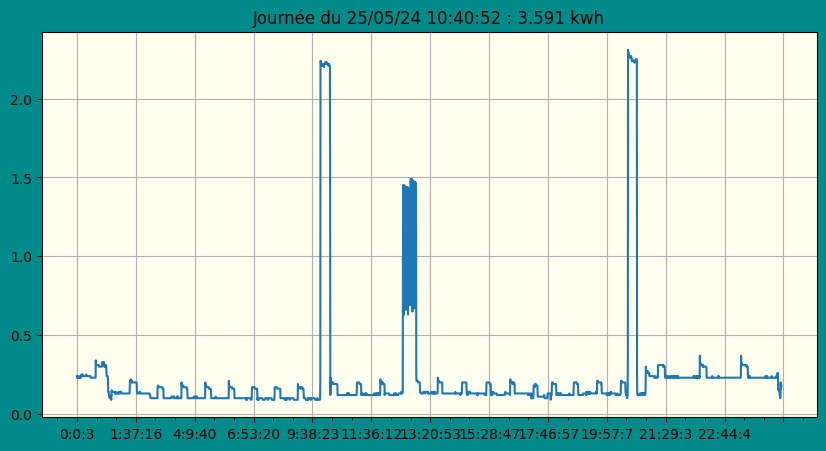

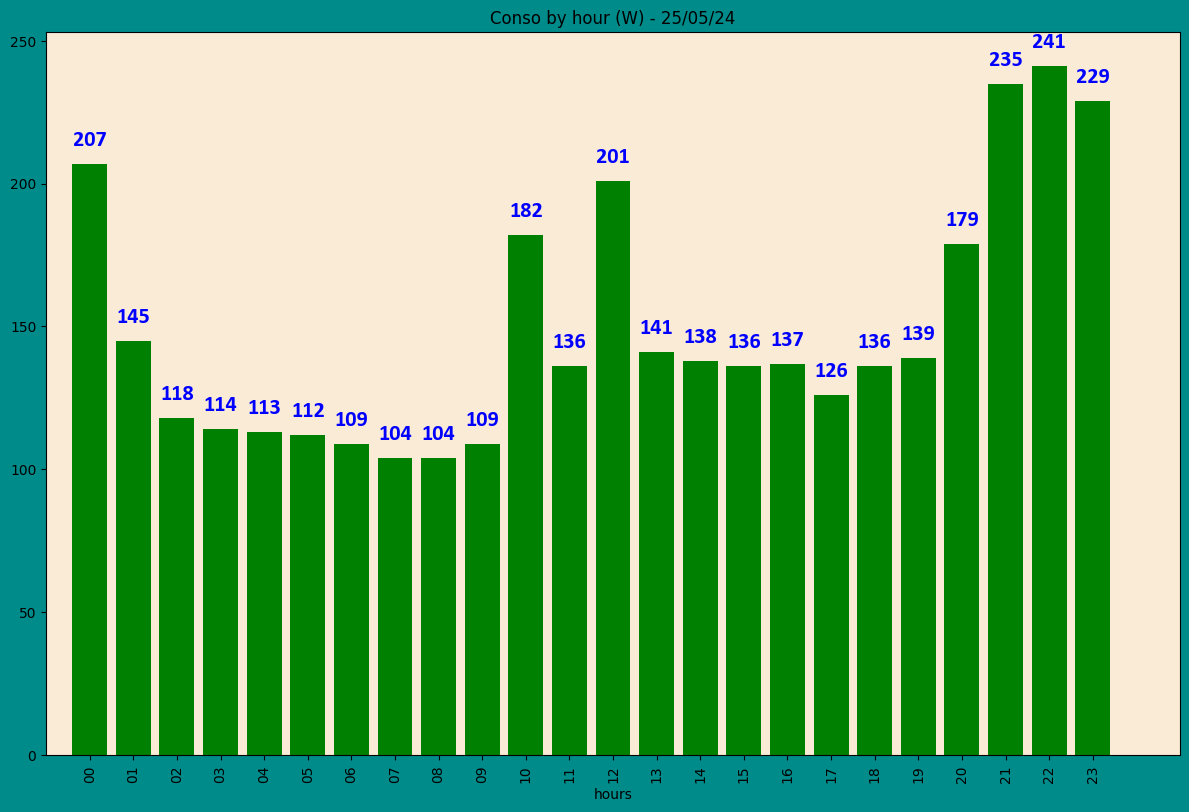

In [104]:
# plot any day
day = '25/05/24'
show(day,pltcolor='darkcyan')
conso_byhour(day)